# Introduction about the dataset

*The dataset has information collected from a company which faces issue with employees leaving the company. The database has information collected from different employees who have left or still staying in the company. The company wants to use your expertise in identifying which is the major contributor for employees leaving the company.* 

1. Satisfaction Level - ranges between 0 & 1 - gives the satisfaction level of the employee
2. last_evaluation - ranges between 0 & 1 - defines the normalised employee's rating in the last appraisal
3. number_project - numeric - No of projects the employee has worked on so far
4. average_monthly_hours - Average amount of hours employee spends in the office per month
5. time_spend_company - Time employee has spent in the company (in months)
6. Work_accident - categorical - If the employee has encountered any accident in the work environment
7. Department - Categorical - Department in which the employee is working/ has worked
8. Salary - Categorical - Divided into low,medium & high 

### Read the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
hr = pd.read_csv("hr-analytics.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Observe the shape and the type of dataset

In [2]:
hr.shape

(14999, 10)

In [3]:
type(hr)

pandas.core.frame.DataFrame

### Use summary statistics to check if missing values,outlier  treament is necessary

In [4]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Preprocessing -  Missing values Treatment 
        

In [5]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Dealing with Outliers - Find IQR and remove the row if there are any outlier
       

In [2]:
# subset data for continuous variables
hr_ct = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company']]
q1 = hr_ct.quantile(0.25)
q3 = hr_ct.quantile(0.75)
iqr = q3-q1

In [3]:
# remove outliers basis 1.5IQR
hr2 = hr[~((hr_ct<(q1-1.5*iqr))|(hr_ct>(q3+1.5*iqr))).any(axis=1)]
hr2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000,13717.000000
mean,0.611729,0.714338,3.783116,200.592768,3.164686,0.141576,0.245097,0.017497
std,0.248126,0.170571,1.243583,49.915380,0.908507,0.348628,0.430161,0.131117
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,198.000000,3.000000,0.000000,0.000000,0.000000
75%,0.810000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,5.000000,1.000000,1.000000,1.000000


### Dealing with Categorical Values - Use LabelEncoder from skilearn to encode categorical variables

In [4]:
#Encode department and salary
labelencoder = LabelEncoder()
hr2['Department'] = labelencoder.fit_transform(hr2.Department)
hr2['salary'] = labelencoder.fit_transform(hr2.salary)
hr2.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
5,0.41,0.50,2,153,3,0,1,0,7,1


### Use Histogram to Check distribution of dependent variable 

(array([10355.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3362.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

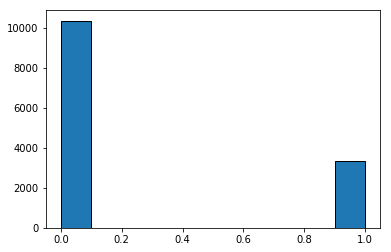

In [10]:

plt.hist(hr2['left'], ec='black')

### Use correlation & scatter matrix to observe the dependency between variables (Drop the dependent variable if the abs(correlation) with dependent variable is <0.01)

In [11]:
#check correlation between continuous variables
hr2.corr()
#none of the continuous variables have correlation <0.01

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.103088,-0.146967,-0.032129,-0.210165,0.063434,-0.444273,0.034254,-0.000749,0.006869
last_evaluation,0.103088,1.000000,0.364904,0.346839,0.197168,0.003159,-0.026146,-0.001568,0.003093,0.012424
number_project,-0.146967,0.364904,1.000000,0.438488,0.299356,-0.004172,0.012697,0.000918,0.006020,0.010517
average_montly_hours,-0.032129,0.346839,0.438488,1.000000,0.202412,-0.002665,0.053215,-0.006497,0.002123,0.009048
time_spend_company,-0.210165,0.197168,0.299356,0.202412,1.000000,-0.050140,0.363662,-0.015010,-0.004838,0.012962
Work_accident,0.063434,0.003159,-0.004172,-0.002665,-0.050140,1.000000,-0.154103,0.036719,0.005869,-0.002094
left,-0.444273,-0.026146,0.012697,0.053215,0.363662,-0.154103,1.000000,-0.051478,0.024341,-0.001689
promotion_last_5years,0.034254,-0.001568,0.000918,-0.006497,-0.015010,0.036719,-0.051478,1.000000,-0.012578,0.024020
Department,-0.000749,0.003093,0.006020,0.002123,-0.004838,0.005869,0.024341,-0.012578,1.000000,-0.001308
salary,0.006869,0.012424,0.010517,0.009048,0.012962,-0.002094,-0.001689,0.024020,-0.001308,1.000000


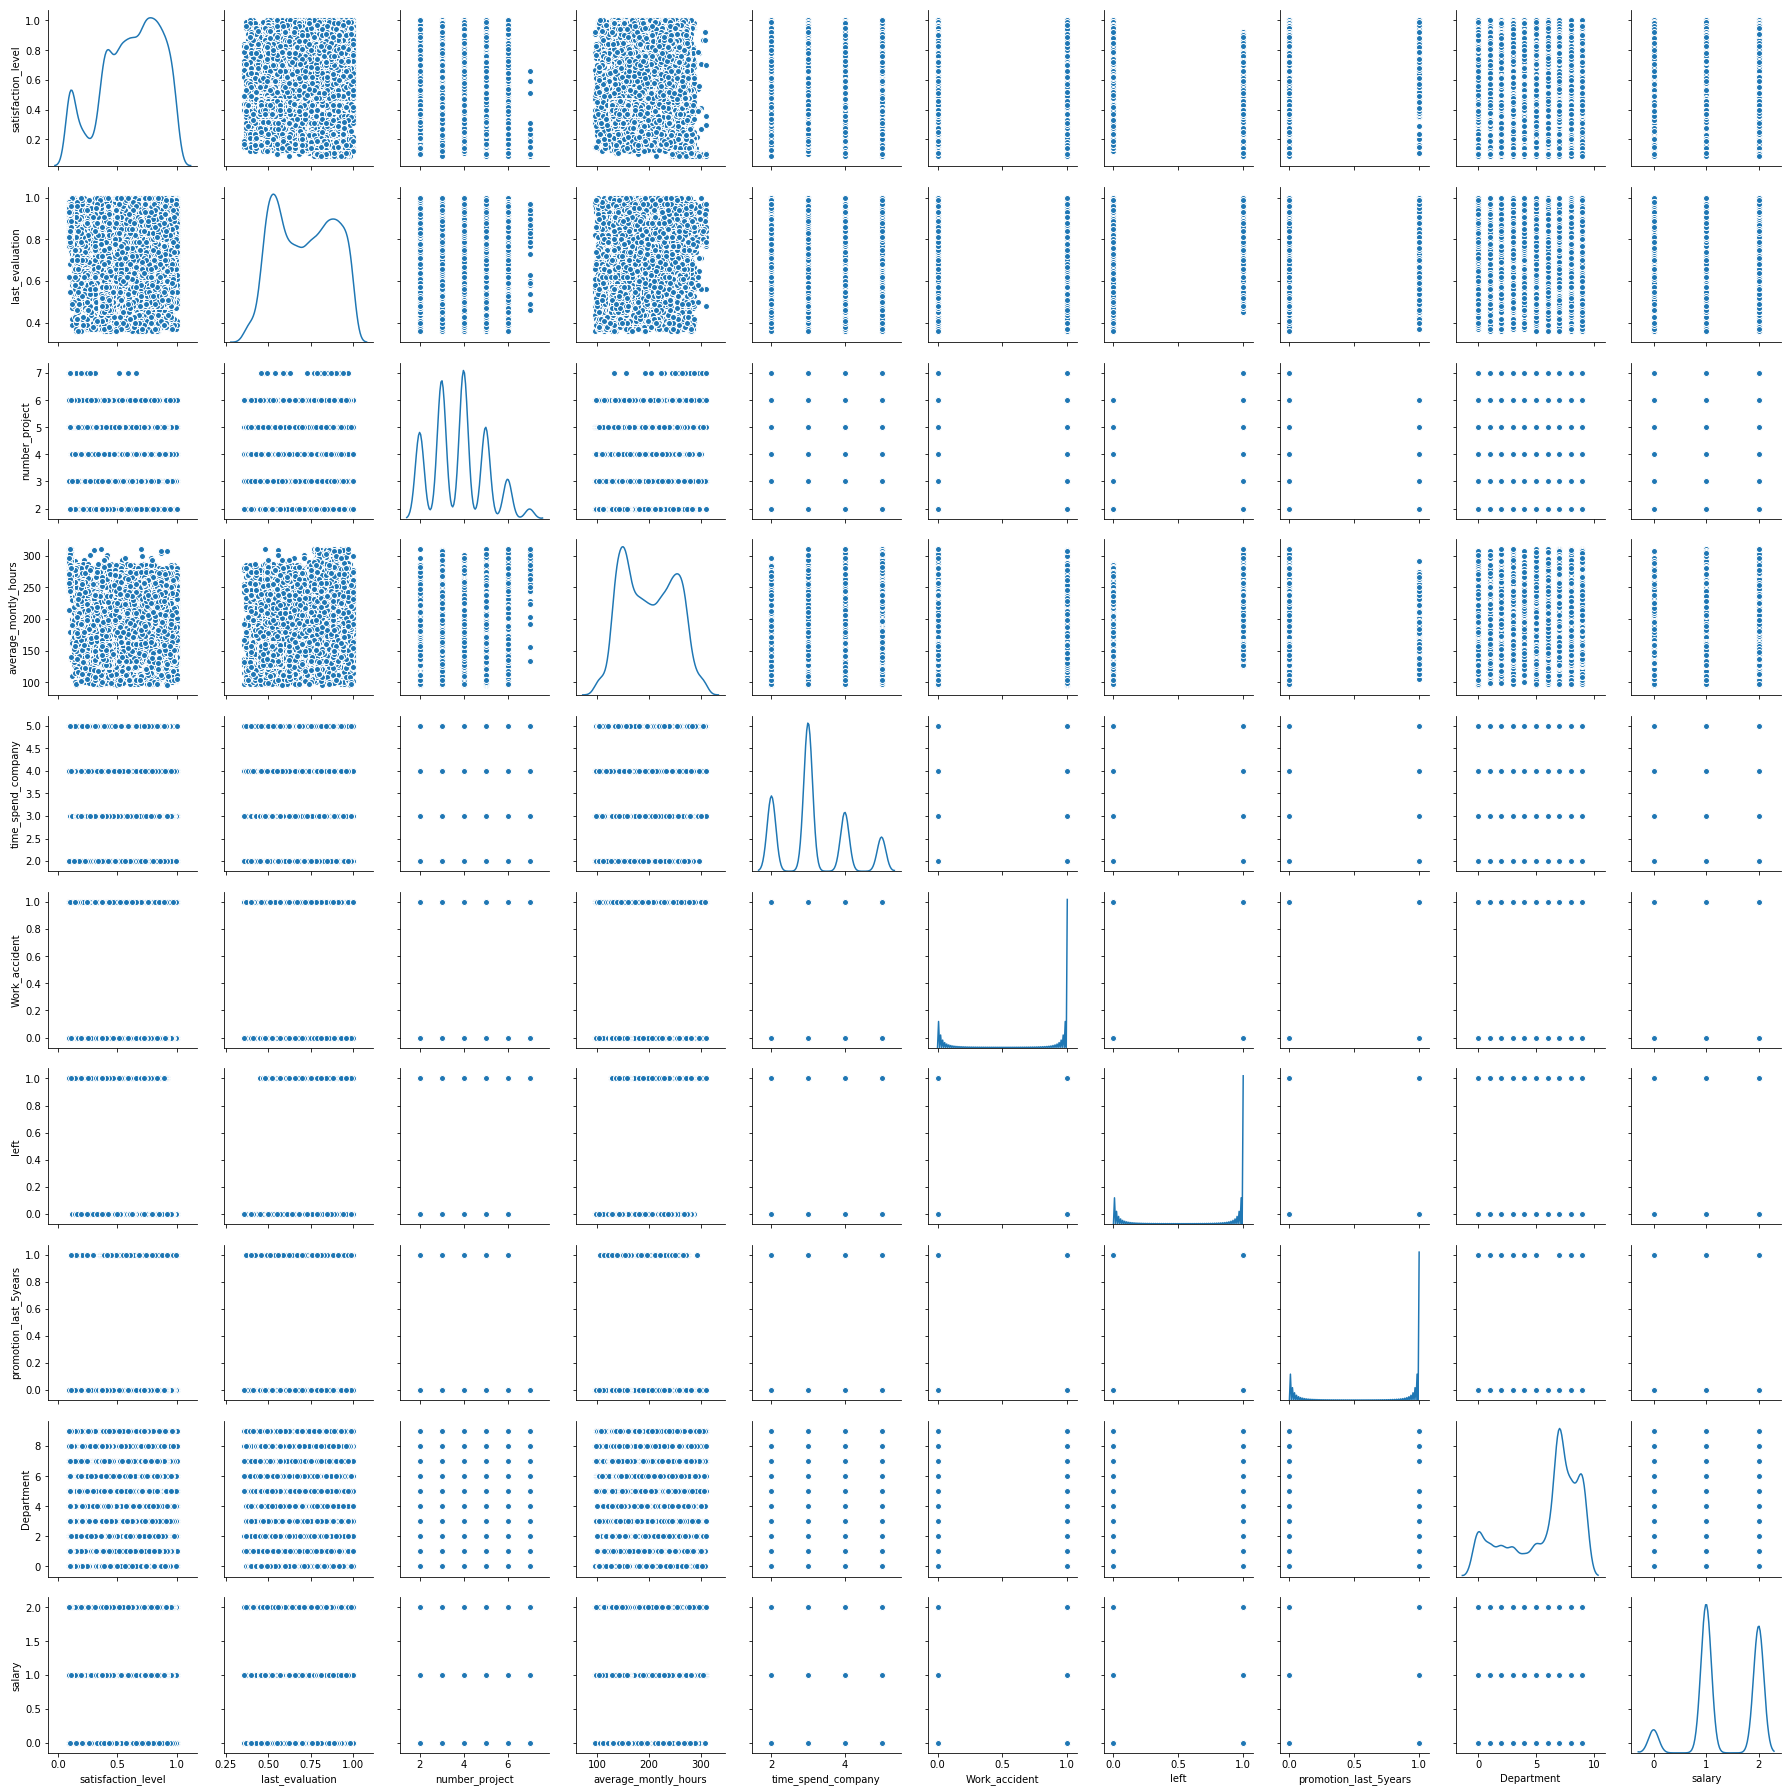

In [33]:
sns.pairplot(hr2, diag_kind='kde')
# categorical variables show similar spread of satisfaction levels across categories
# low correlations between independent variables


### Standardization of Data


In [5]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [6]:
target = hr2['left']
features = hr2.drop(['left'], axis=1)

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.3, random_state = 5)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [9]:
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.fit_transform(X_test)

### Use Naive Bayes Modelling and find out the accuracy of the model

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_scaled, y_train)
print(model)

GaussianNB(priors=None)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
from sklearn import metrics
# make predictions

predicted = model.predict(X_test_scaled)
predicted_tr = model.predict(X_train_scaled)

print( "Accuracy for Test:\n",metrics.classification_report(y_test, predicted),
       "Accuracy for Training:\n",metrics.classification_report(y_train, predicted_tr))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))

Accuracy for Test:
              precision    recall  f1-score   support

          0       0.96      0.85      0.90      3084
          1       0.67      0.90      0.77      1032

avg / total       0.89      0.86      0.87      4116
 Accuracy for Training:
              precision    recall  f1-score   support

          0       0.96      0.86      0.91      7271
          1       0.67      0.90      0.76      2330

avg / total       0.89      0.87      0.87      9601

Confusion Matrix:
 [[2631  453]
 [ 107  925]]


### Use SVM and find out the accuracy & print the confusion matrix

In [12]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc = SVC(C=6, kernel='linear')
svc.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:

prediction = svc.predict(X_test_scaled)
print('Accuracy for test: ', svc.score(X_test_scaled, y_test), "\n",
      'Accuracy for training: ',svc.score(X_train_scaled, y_train))

print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy for test:  0.8486394557823129 
 Accuracy for training:  0.8483491302989272
Confusion Matrix:
 [[2741  280]
 [ 343  752]]


### Find out cross - validation scores with 10-fold for both the models

In [16]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
c,r = y_test.shape
y_test = y_test.reshape(c,)
scores = cross_val_score(svc, X_test_scaled, y_test, cv=10)
scores

array([0.83050847, 0.86440678, 0.86893204, 0.86650485, 0.86131387,
       0.82481752, 0.84671533, 0.84428224, 0.81995134, 0.8296837 ])

### Find the Optimal parameters of the SVM model by tuning hyperparameters: Use c Values: (6,7) & Kernels (rbf, linear) 

In [18]:
def svcm(x,y):
    svc = SVC(C=x, kernel=y)
    svc.fit(X_train_scaled, y_train)
    return print("For c = ",x," and kernel = ", y, "\n",
                 "Accuracy on training set: ", svc.score(X_train_scaled, y_train), "\n",
                 "Accuracy on test set: ", svc.score(X_test_scaled, y_test))
svcm(6,'rbf')
svcm(7,'rbf')
svcm(6,'linear')
svcm(7,'linear')
    
# best hyperparameters are with rbf = kernel and c=6 or 7

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For c =  6  and kernel =  rbf 
 Accuracy on training set:  0.9752109155296323 
 Accuracy on test set:  0.9659863945578231
For c =  7  and kernel =  rbf 
 Accuracy on training set:  0.9762524737006562 
 Accuracy on test set:  0.9659863945578231
For c =  6  and kernel =  linear 
 Accuracy on training set:  0.8483491302989272 
 Accuracy on test set:  0.8486394557823129
For c =  7  and kernel =  linear 
 Accuracy on training set:  0.8482449744818248 
 Accuracy on test set:  0.8488824101068999


In [19]:
svc = SVC(C=6, kernel='rbf')
svc.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Considering the best hyperparameters and performing CrossValidation

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X_test_scaled, y_test, cv=10)
scores


array([0.95641646, 0.96125908, 0.9684466 , 0.95631068, 0.96593674,
       0.96350365, 0.97080292, 0.96107056, 0.97323601, 0.9513382 ])

### Use Decision Tree and find out the feature importances scores and accuracy of the model

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test)

0.9774052478134111

In [22]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                            Imp
satisfaction_level     0.399775
last_evaluation        0.086207
number_project         0.170463
average_montly_hours   0.103257
time_spend_company     0.216228
Work_accident          0.001608
promotion_last_5years  0.000569
Department             0.014374
salary                 0.007520


### Find out cross-validation scores with 10-fold for the above model

In [23]:
cross_val_score(dt_model, X_test, y_test, cv=10)

array([0.96368039, 0.97578692, 0.96359223, 0.9684466 , 0.97080292,
       0.96593674, 0.95620438, 0.94403893, 0.95620438, 0.97323601])

### Compare the accuracy of all the models and find which one is better on the given dataset

In [ ]:
#Decision Tree has the best accuracy